In [1]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), "images resized.")

image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

202 images to be resized.
202 images resized.
가위 이미지 resize 완료!


In [3]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), "images resized.")

image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

201 images to be resized.
201 images resized.
바위 이미지 resize 완료!


In [4]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), "images resized.")

image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보자기 이미지 resize 완료!")

201 images to be resized.
201 images resized.
보자기 이미지 resize 완료!


In [5]:
import numpy as np

def load_data(img_path, number_of_data=604):  
    
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 604 입니다.
x_train shape: (604, 28, 28, 3)
y_train shape: (604,)


라벨: 0


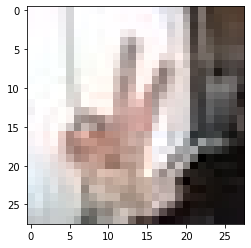

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨:', y_train[0])

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [10]:
#모델 만들기
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(28,28,3))) #이미지 채널 수 바꿔야함!!!!
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(512, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 512)       1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6554112   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(x_train.shape)

(604, 28, 28, 3)


In [13]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
19/19 [==============================] - 6s 129ms/step - loss: 160.0060 - accuracy: 0.3603
Epoch 2/10
19/19 [==============================] - 0s 18ms/step - loss: 0.9282 - accuracy: 0.5590
Epoch 3/10
19/19 [==============================] - 0s 18ms/step - loss: 0.5017 - accuracy: 0.7734
Epoch 4/10
19/19 [==============================] - 0s 18ms/step - loss: 0.2724 - accuracy: 0.9001
Epoch 5/10
19/19 [==============================] - 0s 18ms/step - loss: 0.1880 - accuracy: 0.9220
Epoch 6/10
19/19 [==============================] - 0s 18ms/step - loss: 0.1129 - accuracy: 0.9732
Epoch 7/10
19/19 [==============================] - 0s 18ms/step - loss: 0.0770 - accuracy: 0.9740
Epoch 8/10
19/19 [==============================] - 0s 18ms/step - loss: 0.0450 - accuracy: 0.9914
Epoch 9/10
19/19 [==============================] - 0s 18ms/step - loss: 0.0327 - accuracy: 0.9958
Epoch 10/10
19/19 [==============================] - 0s 18ms/step - loss: 0.0407 - accuracy: 0.9743


In [14]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), "images resized.")

image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor-samples"
resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")

0 images to be resized.
0 images resized.
가위 테스트 이미지 resize 완료!


In [15]:
import numpy as np

def load_data(img_path, number_of_data=300):  
    
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [16]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [17]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), "images resized.")

image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor-samples"
resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")

100 images to be resized.
100 images resized.
가위 테스트 이미지 resize 완료!


In [18]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), "images resized.")

image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock-samples"
resize_images(image_dir_path)

print("바위 테스트 이미지 resize 완료!")

100 images to be resized.
100 images resized.
바위 테스트 이미지 resize 완료!


In [19]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), "images resized.")

image_dir_path=os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper-samples"
resize_images(image_dir_path)

print("보 테스트 이미지 resize 완료!")

100 images to be resized.
100 images resized.
보 테스트 이미지 resize 완료!


In [20]:
import numpy as np

def load_data(img_path, number_of_data=300):  
    
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨: 0


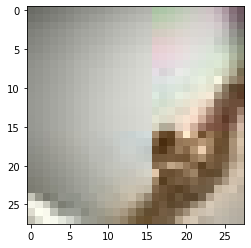

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨:', y_test[0])

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(28,28,3))) #이미지 채널 수 바꿔야함!!!!
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(512, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 512)       1180160   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               6554112   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(x_test.shape)

(300, 28, 28, 3)


In [25]:
model.fit(x_test, y_test, epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 244ms/step - loss: 244.2775 - accuracy: 0.3195
Epoch 2/10
10/10 [==============================] - 0s 18ms/step - loss: 1.8154 - accuracy: 0.3516
Epoch 3/10
10/10 [==============================] - 0s 18ms/step - loss: 1.0188 - accuracy: 0.4900
Epoch 4/10
10/10 [==============================] - 0s 18ms/step - loss: 0.7257 - accuracy: 0.7320
Epoch 5/10
10/10 [==============================] - 0s 18ms/step - loss: 0.4781 - accuracy: 0.7850
Epoch 6/10
10/10 [==============================] - 0s 18ms/step - loss: 0.2762 - accuracy: 0.9004
Epoch 7/10
10/10 [==============================] - 0s 18ms/step - loss: 0.1291 - accuracy: 0.9753
Epoch 8/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0603 - accuracy: 0.9816
Epoch 9/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0397 - accuracy: 0.9871
Epoch 10/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0399 - accuracy: 0.9845


In [27]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.0073 - accuracy: 1.0000
test_loss: 0.007313027512282133 
test_accuracy: 1.0


In [28]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9998498e-01 1.5065080e-05 6.3703376e-11]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


In [30]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_8 (Dense)              (None, 16)               